In [1]:
import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline

# 1- Exploring the dataset

In [2]:
#import the data
train_df = pd.read_csv('Salary_Data.csv')

In [3]:
#Explore the data
train_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#Explore the shape of the data
train_df.shape

(30, 2)

Text(0, 0.5, 'Salary')

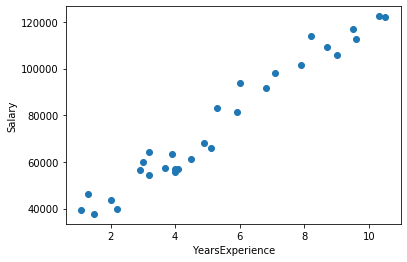

In [5]:
#plot the data to see the relation between YearsExperience and salary
plt.scatter(train_df['YearsExperience'], train_df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [6]:
#split the dataset into features and labels 
x_train = train_df['YearsExperience']
y_train = train_df['Salary']

In [7]:
#Explore the shape of the labels when we convert to numpy array
y_train.values.shape

(30,)

# 2- Compute the Cost

In [8]:
#First,convert the fearues into numpy array and convert the shape to (30,1) intead of (30,)
x_train_reshape = x_train.values.reshape(30,1)

#Create array of ones , which representes the x_0, to combine it with the rest of the features
ones = np.ones((30,1))

#Combining  so the shape of  the features will be (30,2)
X = np.concatenate((ones, x_train_reshape), axis = 1)

#convert it to numpy array  of size (30,)
y = y_train.values

In [18]:
#Define the number of the training examples
m = X.shape[0]

print("The number of training examples: {0}".format(m))

The number of training examples: 30


In [22]:
def computeCost(X,y,theta):
    '''
    Usage:
      #computCost --> computes the cost for linear regression
  
    
    Arguments:
      #X --> The Design Matrix
      #y --> The Ground Truth
      #thea --> The Parameters which need to update
    
    Returns:
      #The cost value
    '''
    
    #Compute  Our hypothesis function 
    h = np.matmul(X,theta)
    
    #Compute the square errors using element-wise operations 
    sqrErrors = np.power((h-y), 2)
    
    #Compute the cost the function
    J = (1/2*m)*(np.sum(sqrErrors))
    
    return J

# 3- Compute the Gradient Descent

In [41]:
def gradientDescent(X,y,theta,alpha,num_iters):
    '''
    Usage:
      #gradientDescent --> computes the gradient descent for linear regression
  
    
    Arguments:
      #X --> The Design Matrix
      #y --> The Ground Truth
      #theta --> The Parameters which need to update
      #alpha --> is the learning rate which indicates the learning step or how far we go down 
      #num_iters--> is the nymber of iterations needed to go to the global optimal value 
    
    Returns:
      #The updated parameters,theta 
      #cost_history: which is list containing the the values of the cost function, J, for every iteration
    '''
    #Define the cost history as empty list
    cost_history = []
    
    #Keep until Convergence
    for i in range(num_iters+1):
        
        #dtheta is the partial derivates of cost function with respect to the parameters, theta
        dtheta = (1/m)*((np.matmul(np.matmul(X.T,X), theta)) - (np.matmul(X.T, y)))
        
        #Update theta
        theta = theta - alpha*dtheta
        
        #While debugging, it can be useful to print out the values of the cost function (computeCost) and gradient here.
        cost = computeCost(X,y,theta)
        
        #Append the value of the cost at a specific value for theta to cost_history
        cost_history.append(cost)
        
        #print the cost function for every itration to track its new value step-by-step
        print("Reached iteration: {0}, the cost = {1}".format(i, cost))
    
    print("\n\nParameters have been trained!") 
    
    return theta, cost_history

# 4- Make Predictions

In [35]:
def pred(input_pred,theta):
    '''
    Usage:
      #pred --> used to predict the output of the input
      
    Arguments:
      #input_pred --> the input you want to predict its output 
      #theta --> the updated param
    
    Returns:
      #The predicted output
    '''
    prediction = np.matmul(input_pred, theta)
    
    print("The output: {0}".format(prediction))
    
    return prediction

# Training the model 

In [42]:
theta, cost_history = gradientDescent(X,y,theta = np.array([0, 0]),alpha = 0.01,num_iters = 1000)

Reached iteration: 0, the cost = 1210151273257.2192
Reached iteration: 1, the cost = 524640275212.4914
Reached iteration: 2, the cost = 250736243383.46808
Reached iteration: 3, the cost = 141211743129.48602
Reached iteration: 4, the cost = 97334272378.82127
Reached iteration: 5, the cost = 79674115955.75812
Reached iteration: 6, the cost = 72484660011.49042
Reached iteration: 7, the cost = 69477350228.44183
Reached iteration: 8, the cost = 68140793439.0254
Reached iteration: 9, the cost = 67472039763.025475
Reached iteration: 10, the cost = 67070549724.258385
Reached iteration: 11, the cost = 66776361869.70378
Reached iteration: 12, the cost = 66525591753.839195
Reached iteration: 13, the cost = 66292724158.348175
Reached iteration: 14, the cost = 66067566970.994095
Reached iteration: 15, the cost = 65846047509.82843
Reached iteration: 16, the cost = 65626536952.44332
Reached iteration: 17, the cost = 65408382463.69266
Reached iteration: 18, the cost = 65191320987.65383
Reached iterati

In [43]:
#lets print the updated Parameters
print("The updated parameters: {}".format(theta))

The updated parameters: [22926.5599021   9875.21134424]


In [44]:
#Lets make prediction, in this case we wil make predictions one of the training examples 
print("The Ground Truth: {0}".format(y[0]))
prediction = pred(X[0], theta)

The Ground Truth: 39343.0
The output: 33789.29238076394


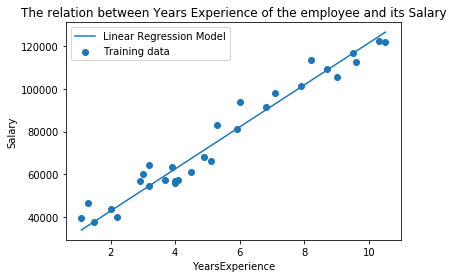

In [52]:
# Plot the line of the model in the scatter plot to show how well the model fits the data
plt.scatter(train_df['YearsExperience'], train_df['Salary'], label = 'Training data')
plt.plot(train_df['YearsExperience'],np.matmul(X, theta), label = 'Linear Regression Model')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title("The relation between Years Experience of the employee and its Salary")
plt.legend()

# Congratulations